Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1. 1. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]]]
(2, 2, 3) <class 'numpy.float32'>
(3, 3) <class 'numpy.float32'>
Roatated RGB [[[ 1.          1.          1.        ]
  [ 0.6666667   0.6666667  -0.33333334]]

 [[ 0.6666667  -0.33333334  0.6666667 ]
  [-0.33333334  0.6666667   0.6666667 ]]]
[[[1.        1.        1.       ]
  [0.6666667 0.6666667 0.       ]]

 [[0.6666667 0.        0.6666667]
  [0.        0.6666667 0.6666667]]]
[[[1.         1.         1.        ]
  [0.88888896 0.22222224 0.22222224]]

 [[0.22222224 0.22222224 0.88888896]
  [0.22222224 0.88888896 0.22222224]]]
[[[1.         1.         1.        ]
  [1.         0.00000024 0.00000024]]

 [[0.00000119 0.00000024 1.        ]
  [0.00000024 1.         0.00000072]]]
[[0. 0.]
 [0. 0.]]
[[0.         0.11111114]
 [0.11111114 0.11111114]]


[]

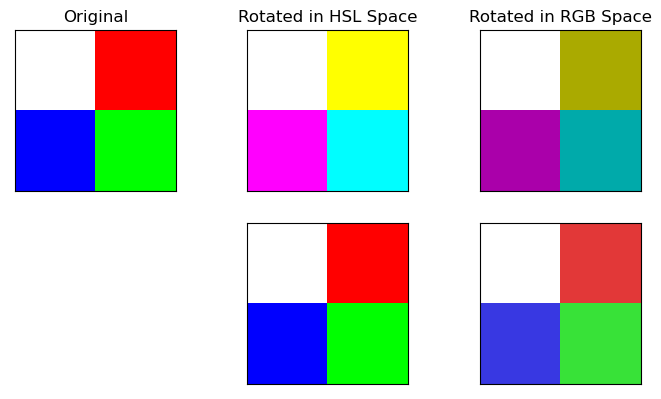

In [70]:
# Imports
import numpy as np, cv2, matplotlib, math
from matplotlib import pyplot as plt
# Define 2-by-2 image
image = np.zeros([2, 2, 3], dtype=np.float32)

# First corner white
image[0, 0, :] = 1.0
# Second corner red
image[0, 1, 0] = 1.0
# Thrid corner green
image[1, 1, 1] = 1.0
# Fourth corner green
image[1, 0, 2] = 1.0
# Sanity check image
print(image)

# Show image for sanity check
matplotlib.rcParams['figure.figsize'] = [8.5, 4.6]
plt.figure()
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(image)
print(image.shape, type(image[0][0][0]))

# Shift image with cv2
image_lifted = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_BGR2HSV)
image_lifted[:, :, 0] += 60.0
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_HSV2BGR)
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 2)
plt.title("Rotated in HSL Space")
plt.imshow(image_lifted)

image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_RGB2BGR)
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_BGR2HSV)
image_lifted[:, :, 0] -= 60.0
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_HSV2BGR)
image_lifted = cv2.cvtColor(image_lifted, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 5)
plt.imshow(image_lifted)

# Rotated image on RGB Cube
rot = 6
cos = math.cos(2 * math.pi / rot)
sin = math.sin(2 * math.pi / rot)
const_a = 1 / 3 * (1.0 - cos)
const_b = math.sqrt(1 / 3) * sin
# Construct rotation matrix
rot_mat = np.array([
            [cos + const_a, const_a - const_b, const_a + const_b],
            [const_a + const_b, cos + const_a, const_a - const_b],
            [const_a - const_b, const_a + const_b, cos + const_a],
        ],dtype=np.float32,)
print(rot_mat.shape, type(rot_mat[0][0]))
# Rotated image
image_rot = np.zeros([2, 2, 3], dtype=np.float32)
image_rot[0, 0, :] = np.matmul(rot_mat, image[0, 0, :])
image_rot[1, 0, :] = np.matmul(rot_mat, image[1, 0, :])
image_rot[0, 1, :] = np.matmul(rot_mat, image[0, 1, :])
image_rot[1, 1, :] = np.matmul(rot_mat, image[1, 1, :])
plt.subplot(2, 3, 3)
plt.imshow(image_rot)
plt.title("Rotated in RGB Space")

print("Roatated RGB", image_rot)
image_rot = np.clip(image_rot, 0.0, 1.0)
print(image_rot)
rot = -6
cos = math.cos(2 * math.pi / rot)
sin = math.sin(2 * math.pi / rot)
const_a = 1 / 3 * (1.0 - cos)
const_b = math.sqrt(1 / 3) * sin
# Construct rotation matrix
rot_mat = np.array([
            [cos + const_a, const_a - const_b, const_a + const_b],
            [const_a + const_b, cos + const_a, const_a - const_b],
            [const_a - const_b, const_a + const_b, cos + const_a],
        ],dtype=np.float32,)
image_rot2 = np.zeros([2, 2, 3], dtype=np.float32)
image_rot2[0, 0, :] = np.matmul(rot_mat, image_rot[0, 0, :])
image_rot2[1, 0, :] = np.matmul(rot_mat, image_rot[1, 0, :])
image_rot2[0, 1, :] = np.matmul(rot_mat, image_rot[0, 1, :])
image_rot2[1, 1, :] = np.matmul(rot_mat, image_rot[1, 1, :])
plt.subplot(2, 3, 6)
plt.imshow(image_rot2)
print(image_rot2)
print(image_lifted)

print(((image_lifted - image)**2).mean(axis=2))
print(((image_rot2 - image)).mean(axis=2))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])